In [1]:
#Import Relivent librarey
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('dataframe')

In [3]:
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [4]:
# Get some basic statistics about the data
print("Data statistics:")
print(df.describe())
print("\n")

Data statistics:
             input       output
count  1696.000000  1696.000000
mean      1.159933   -34.088017
std      79.005970    65.771112
min    -134.962839  -132.422167
25%     -63.386506   -80.026767
50%      10.195194   -50.470981
75%      70.264109   -11.000000
max     134.605775   134.425495




In [5]:
#Check the Null values

In [6]:
df.isnull().sum()

input     1
output    1
dtype: int64

In [7]:
#Remeove the null values

In [8]:
df.dropna(axis=0,inplace=True)

In [9]:
#again check the null values
df.isnull().sum()

input     0
output    0
dtype: int64

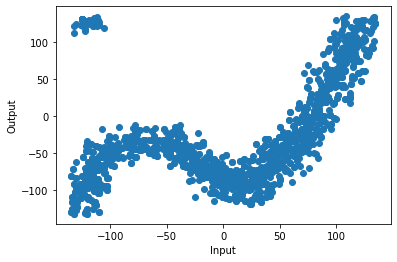

In [10]:
# Plot the data to visualize the relationship between input and output
import matplotlib.pyplot as plt

plt.scatter(df['input'], df['output'])
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

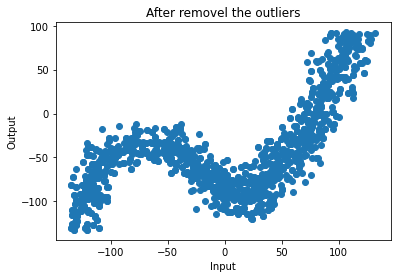

In [11]:
#Remove the Outliers from the data using IQR

# Calculate the IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove data points outside of the range Q1 - 1.5 * IQR to Q3 + 1.5 * IQR
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Plot the data to visualize the relationship between input and output
import matplotlib.pyplot as plt

plt.scatter(df['input'], df['output'])
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('After removel the outliers')
plt.show()

In [12]:
#Our data has a sine-like pattern, which cannot be modeled effectively using linear regression.
#As law and exponential transformations do not provide satisfactory results, 
#we have used polynomial regression to obtain the best results.
# Split the data into training and testing sets
X = df[['input']].values.reshape(-1, 1)
y = df['output'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# Transform the data to higher degree polynomials
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)

In [14]:
# Fit the polynomial regression model to the training data
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

In [15]:
# Make predictions on the testing data
y_pred = regressor.predict(poly_reg.fit_transform(X_test))

In [16]:
# Evaluate the model performance
print("Mean Absolute Error:", np.mean(np.abs(y_pred - y_test)))

Mean Absolute Error: 28.16422678252644


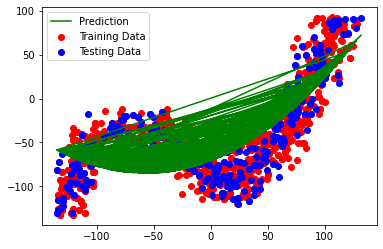

In [17]:
# Plot the results
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.scatter(X_test, y_test, color='blue', label='Testing Data')
plt.plot(X_test, y_pred, color='green', label='Prediction')
plt.legend()
plt.show()

In [18]:
#Some more ML MOdels

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
# Fit and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [21]:
# Fit and train the Random Forest Regression model
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

<ipython-input-21-c26275307d40>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [22]:
# Fit and train the Decision Tree Regression model
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [23]:
# Fit and train the Support Vector Regression model
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

C:\Users\Hassan Babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(kernel='linear')

In [24]:
# Fit and train the K-Nearest Neighbors Regression model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [25]:
# Make predictions using each model
lin_reg_pred = lin_reg.predict(X_test)
rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)
svr_pred = svr.predict(X_test)
knn_pred = knn.predict(X_test)

In [26]:
# Evaluate the performance of each model using various metrics
lin_reg_mae = mean_absolute_error(y_test, lin_reg_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)
svr_mae = mean_absolute_error(y_test, svr_pred)
knn_mae = mean_absolute_error(y_test, knn_pred)

In [27]:
lin_reg_mse = mean_squared_error(y_test, lin_reg_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
svr_mse = mean_squared_error(y_test,svr_pred)
knn_mae =  mean_squared_error(y_test, knn_pred)

In [33]:
# printing the evaluation metrics for all models
print("The mean Squared Error of Modls is")
print("SVR MSE:", svr_mse)
print("DT MSE:", dt_mse)
print("RF MSE:", rf_mse)

print('LA MSE:',lin_reg_mse)

The mean Squared Error of Modls is
SVR MSE: 1676.9282235546798
DT MSE: 329.5857338653751
RF MSE: 304.3116641179133
LA MSE: 1631.5357196301745


In [34]:
# printing the evaluation metrics for all models
print("The mean mean_absolute_error of Modls is")
print("SVR MAE:", svr_mae)
print("DT MAE:", dt_mae)
print("RF MAE:", rf_mae)
print('KNN MAE:',knn_mae)
print('LA MAE:',lin_reg_mae)

The mean mean_absolute_error of Modls is
SVR MAE: 33.069220704876834
DT MAE: 8.993783487531923
RF MAE: 11.780504152502713
KNN MAE: 395.58924563484123
LA MAE: 33.19182227188995
